In [76]:
import os
import numpy as np
import pandas as pd
import torch
import os
import json
import pandas as pd
from PIL import Image
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import cv2
import numpy as np
%matplotlib inline
from tqdm import tqdm
import glob
import pickle

In [77]:
!ls /mnt/chicm/data/open-images/relation

challenge-2019-attributes-description.csv
challenge-2019-classes-vrd.csv
challenge-2019-relationships-description.csv
challenge-2019-relationship-triplets.csv
challenge-2019-train-vrd-bbox.csv
challenge-2019-train-vrd.csv
challenge-2019-train-vrd-labels.csv
challenge-2019-validation-vrd-bbox.csv
challenge-2019-validation-vrd.csv
challenge-2019-validation-vrd-labels.csv
classes_is_42.csv
negative_tuples_0804.csv
negative_tuples.csv
top_classes_42.csv
top_classes.csv
val_imgs.csv
VRD_sample_submission.csv


In [78]:
df_a = pd.read_csv('/mnt/chicm/data/open-images/relation/challenge-2019-attributes-description.csv', names=['class', 'name'])
df_a.head()

,class,name
0,/m/02gy9n,Transparent
1,/m/05z87,Plastic
2,/m/0dnr7,(made of)Textile
3,/m/04lbp,(made of)Leather
4,/m/083vt,Wooden


In [79]:
df_c = pd.read_csv('/mnt/chicm/data/open-images/relation/challenge-2019-classes-vrd.csv', names=['class', 'name'])
df_c.head()

,class,name
0,/m/05r5c,Piano
1,/m/01599,Beer
2,/m/01_5g,Chopsticks
3,/m/01yrx,Cat
4,/m/04_sv,Motorcycle


In [80]:
d = df_c.set_index('class').to_dict()['name']

In [81]:
d.update(df_a.set_index('class').to_dict()['name'])

In [82]:
df_train = pd.read_csv('/mnt/chicm/data/open-images/relation/challenge-2019-train-vrd.csv')
df_train.head()

,ImageID,LabelName1,LabelName2,XMin1,XMax1,YMin1,YMax1,XMin2,XMax2,YMin2,YMax2,RelationshipLabel
0,fe58ec1b06db2bb7,/m/04bcr3,/m/083vt,0.00500,0.033125,0.580000,0.627778,0.00500,0.033125,0.580000,0.627778,is
1,82d16a22f703df5c,/m/04dr76w,/m/02gy9n,0.61200,0.735000,0.418919,0.950450,0.61200,0.735000,0.418919,0.950450,is
2,b54d41beabcfd900,/m/01mzpv,/m/083vt,0.37250,0.399375,0.706413,0.778557,0.37250,0.399375,0.706413,0.778557,is
3,4b6a08cc110d7275,/m/01mzpv,/m/01y9k5,0.17125,0.255625,0.557500,0.749167,0.20750,0.683125,0.611667,0.999167,at
4,0144cfbb726f4c72,/m/01mzpv,/m/04bcr3,0.85500,0.950000,0.561667,0.609167,0.82875,0.999375,0.568333,0.673333,at


In [83]:
df_train.loc[df_train.RelationshipLabel=='inside_of'].LabelName1.unique()

array(['/m/04yx4', '/m/0bt9lr', '/m/01bl7v', '/m/05r655', '/m/03bt1vf',
       '/m/01yrx'], dtype=object)

In [84]:
df_train.loc[df_train.RelationshipLabel=='inside_of'].LabelName2.unique()

array(['/m/0k4j', '/m/0pg52', '/m/0h2r6', '/m/01s55n', '/m/01940j',
       '/m/080hkjn'], dtype=object)

In [88]:
df_train.loc[df_train.RelationshipLabel=='inside_of'].target.unique()

array(['/m/04yx4,/m/0k4j', '/m/0bt9lr,/m/0k4j', '/m/04yx4,/m/0pg52',
       '/m/01bl7v,/m/0k4j', '/m/05r655,/m/0k4j', '/m/03bt1vf,/m/0k4j',
       '/m/04yx4,/m/0h2r6', '/m/01yrx,/m/0k4j', '/m/01yrx,/m/01s55n',
       '/m/01bl7v,/m/0h2r6', '/m/01yrx,/m/01940j', '/m/03bt1vf,/m/0h2r6',
       '/m/05r655,/m/0h2r6', '/m/0bt9lr,/m/0h2r6', '/m/03bt1vf,/m/0pg52',
       '/m/01yrx,/m/080hkjn', '/m/01bl7v,/m/0pg52'], dtype=object)

In [102]:
df_train.loc[df_train.RelationshipLabel=='hits'].LabelName1.unique()

array(['/m/04yx4', '/m/01bl7v', '/m/05r655', '/m/03bt1vf'], dtype=object)

In [103]:
df_train.loc[df_train.RelationshipLabel=='hits'].LabelName2.unique()

array(['/m/01226z', '/m/0wdt60w', '/m/05ctyq'], dtype=object)

In [104]:
df_train.loc[df_train.RelationshipLabel=='hits'].target.unique()

array(['/m/04yx4,/m/01226z', '/m/04yx4,/m/0wdt60w', '/m/01bl7v,/m/01226z',
       '/m/05r655,/m/01226z', '/m/03bt1vf,/m/01226z',
       '/m/04yx4,/m/05ctyq', '/m/03bt1vf,/m/05ctyq',
       '/m/05r655,/m/05ctyq'], dtype=object)

In [59]:
df_train.loc[df_train.RelationshipLabel=='wears'].LabelName1.unique()

array(['/m/03bt1vf', '/m/04yx4', '/m/05r655', '/m/01bl7v'], dtype=object)

In [60]:
df_train.loc[df_train.RelationshipLabel=='wears'].LabelName2.unique()

array(['/m/080hkjn', '/m/071p9', '/m/01940j', '/m/06__v', '/m/0584n8',
       '/m/01s55n'], dtype=object)

In [61]:
df_train.loc[df_train.RelationshipLabel=='wears'].target.unique()

array(['/m/03bt1vf,/m/080hkjn', '/m/04yx4,/m/071p9', '/m/04yx4,/m/01940j',
       '/m/04yx4,/m/06__v', '/m/05r655,/m/080hkjn', '/m/04yx4,/m/080hkjn',
       '/m/04yx4,/m/0584n8', '/m/01bl7v,/m/01940j', '/m/05r655,/m/01940j',
       '/m/03bt1vf,/m/01940j', '/m/03bt1vf,/m/071p9',
       '/m/01bl7v,/m/071p9', '/m/05r655,/m/071p9', '/m/05r655,/m/01s55n',
       '/m/01bl7v,/m/01s55n'], dtype=object)

In [75]:
df_train.loc[df_train.RelationshipLabel=='plays'].LabelName1.unique()

array(['/m/04yx4(Man)', '/m/03bt1vf(Woman)', '/m/01bl7v(Boy)',
       '/m/05r655(Girl)'], dtype=object)

In [72]:
df_train.loc[df_train.RelationshipLabel=='plays'].LabelName2.unique()

array(['/m/0342h(Guitar)', '/m/07y_7(Violin)', '/m/026t6(Drum)',
       '/m/05r5c(Piano)', '/m/0l14j_(Flute)'], dtype=object)

In [74]:
df_train.loc[df_train.RelationshipLabel=='plays'].target.unique()

array(['/m/04yx4,/m/0342h', '/m/03bt1vf,/m/0342h', '/m/01bl7v,/m/0342h',
       '/m/03bt1vf,/m/07y_7', '/m/04yx4,/m/026t6', '/m/05r655,/m/0342h',
       '/m/04yx4,/m/07y_7', '/m/05r655,/m/026t6', '/m/04yx4,/m/05r5c',
       '/m/05r655,/m/07y_7', '/m/03bt1vf,/m/0l14j_', '/m/04yx4,/m/0l14j_',
       '/m/03bt1vf,/m/026t6', '/m/03bt1vf,/m/05r5c',
       '/m/05r655,/m/0l14j_', '/m/01bl7v,/m/026t6', '/m/05r655,/m/05r5c',
       '/m/01bl7v,/m/07y_7', '/m/01bl7v,/m/05r5c', '/m/01bl7v,/m/0l14j_'],
      dtype=object)

In [89]:
df_train.loc[df_train.RelationshipLabel=='holds'].LabelName1.unique()

array(['/m/03bt1vf', '/m/04yx4', '/m/05r655', '/m/01bl7v'], dtype=object)

In [94]:
df_train.loc[df_train.RelationshipLabel=='holds'].LabelName2.unique()

array(['/m/05_5p_0', '/m/0hg7b', '/m/0dv5r', '/m/0dv9c', '/m/0342h',
       '/m/09tvcd', '/m/01226z', '/m/050k8', '/m/01599', '/m/04dr76w',
       '/m/07y_7', '/m/02p5f1q', '/m/0h8my_4', '/m/0wdt60w', '/m/071p9',
       '/m/026t6', '/m/080hkjn', '/m/0cmx8', '/m/0l14j_', '/m/04ctx',
       '/m/019w40', '/m/01_5g', '/m/01f91_', '/m/01940j', '/m/01s55n',
       '/m/02jvh9', '/m/06__v', '/m/05ctyq', '/m/0dt3t', '/m/0584n8'],
      dtype=object)

In [95]:
df_train.loc[df_train.RelationshipLabel=='holds'].target.unique()

array(['/m/03bt1vf,/m/05_5p_0', '/m/04yx4,/m/0hg7b', '/m/04yx4,/m/0dv5r',
       '/m/03bt1vf,/m/0dv9c', '/m/03bt1vf,/m/0hg7b', '/m/04yx4,/m/0342h',
       '/m/03bt1vf,/m/09tvcd', '/m/04yx4,/m/01226z',
       '/m/05r655,/m/01226z', '/m/04yx4,/m/050k8', '/m/04yx4,/m/01599',
       '/m/03bt1vf,/m/04dr76w', '/m/03bt1vf,/m/07y_7',
       '/m/03bt1vf,/m/0342h', '/m/04yx4,/m/09tvcd', '/m/04yx4,/m/04dr76w',
       '/m/03bt1vf,/m/01599', '/m/03bt1vf,/m/02p5f1q',
       '/m/04yx4,/m/0h8my_4', '/m/04yx4,/m/0wdt60w',
       '/m/03bt1vf,/m/071p9', '/m/05r655,/m/02p5f1q', '/m/04yx4,/m/026t6',
       '/m/03bt1vf,/m/0h8my_4', '/m/04yx4,/m/07y_7',
       '/m/04yx4,/m/02p5f1q', '/m/05r655,/m/07y_7', '/m/05r655,/m/0342h',
       '/m/05r655,/m/0hg7b', '/m/03bt1vf,/m/080hkjn',
       '/m/03bt1vf,/m/0dv5r', '/m/03bt1vf,/m/050k8',
       '/m/03bt1vf,/m/0cmx8', '/m/05r655,/m/0l14j_',
       '/m/03bt1vf,/m/04ctx', '/m/05r655,/m/019w40',
       '/m/05r655,/m/080hkjn', '/m/05r655,/m/050k8',
       '/m/05r655,/m/

In [98]:
df_train.loc[df_train.RelationshipLabel=='on'].LabelName1.unique()

array(['/m/04yx4', '/m/03bt1vf', '/m/05r655', '/m/04dr76w', '/m/09tvcd',
       '/m/02p5f1q', '/m/02jvh9', '/m/0dt3t', '/m/0bt9lr', '/m/0cmx8',
       '/m/01599', '/m/01bl7v', '/m/04ctx', '/m/01yrx', '/m/01_5g',
       '/m/03qrc'], dtype=object)

In [97]:
df_train.loc[df_train.RelationshipLabel=='on'].LabelName2.unique()

array(['/m/0199g', '/m/01mzpv', '/m/04bcr3', '/m/0cvnqh', '/m/01y9k5',
       '/m/04_sv', '/m/03ssj5', '/m/03m3pdh', '/m/03k3r', '/m/078n6m',
       '/m/029bxz', '/m/0fx9l'], dtype=object)

In [100]:
df_train.loc[df_train.RelationshipLabel=='on'].target.unique()

array(['/m/04yx4,/m/0199g', '/m/03bt1vf,/m/01mzpv', '/m/05r655,/m/01mzpv',
       '/m/04yx4,/m/01mzpv', '/m/04dr76w,/m/04bcr3',
       '/m/03bt1vf,/m/0199g', '/m/09tvcd,/m/04bcr3', '/m/04yx4,/m/0cvnqh',
       '/m/02p5f1q,/m/01y9k5', '/m/04yx4,/m/04_sv', '/m/02jvh9,/m/04bcr3',
       '/m/0dt3t,/m/04bcr3', '/m/03bt1vf,/m/03ssj5',
       '/m/0bt9lr,/m/0cvnqh', '/m/0cmx8,/m/04bcr3', '/m/01599,/m/04bcr3',
       '/m/03bt1vf,/m/0cvnqh', '/m/05r655,/m/04_sv',
       '/m/04yx4,/m/03m3pdh', '/m/02p5f1q,/m/04bcr3', '/m/04yx4,/m/03k3r',
       '/m/03bt1vf,/m/03k3r', '/m/01bl7v,/m/0199g', '/m/01bl7v,/m/01mzpv',
       '/m/05r655,/m/03k3r', '/m/0bt9lr,/m/04bcr3', '/m/04ctx,/m/04bcr3',
       '/m/03bt1vf,/m/04_sv', '/m/03bt1vf,/m/03m3pdh',
       '/m/01yrx,/m/04bcr3', '/m/04dr76w,/m/01y9k5', '/m/01yrx,/m/01mzpv',
       '/m/01bl7v,/m/0cvnqh', '/m/04yx4,/m/03ssj5', '/m/05r655,/m/03ssj5',
       '/m/05r655,/m/0cvnqh', '/m/01_5g,/m/04bcr3', '/m/0bt9lr,/m/03ssj5',
       '/m/01yrx,/m/03ssj5', '/m/0bt9l

In [105]:
df_train.loc[df_train.RelationshipLabel=='under'].LabelName1.unique()

array(['/m/0bt9lr', '/m/01yrx'], dtype=object)

In [106]:
df_train.loc[df_train.RelationshipLabel=='under'].LabelName2.unique()

array(['/m/04bcr3', '/m/01y9k5', '/m/01mzpv', '/m/0cvnqh', '/m/078n6m',
       '/m/0k4j'], dtype=object)

In [107]:
df_train.loc[df_train.RelationshipLabel=='under'].target.unique()

array(['/m/0bt9lr,/m/04bcr3', '/m/0bt9lr,/m/01y9k5', '/m/01yrx,/m/01mzpv',
       '/m/0bt9lr,/m/01mzpv', '/m/0bt9lr,/m/0cvnqh', '/m/01yrx,/m/04bcr3',
       '/m/0bt9lr,/m/078n6m', '/m/01yrx,/m/0k4j'], dtype=object)

In [101]:
16*12

192

In [66]:
df_train.LabelName1 = df_train.LabelName1.map(lambda x: x+'(' + d[x]+')')
df_train.LabelName2 = df_train.LabelName2.map(lambda x: x+'(' + d[x]+')')
df_train.head()

,ImageID,LabelName1,LabelName2,XMin1,XMax1,YMin1,YMax1,XMin2,XMax2,YMin2,YMax2,RelationshipLabel,target
0,fe58ec1b06db2bb7,/m/04bcr3(Table),/m/083vt(Wooden),0.00500,0.033125,0.580000,0.627778,0.00500,0.033125,0.580000,0.627778,is,"/m/04bcr3,/m/083vt"
1,82d16a22f703df5c,/m/04dr76w(Bottle),/m/02gy9n(Transparent),0.61200,0.735000,0.418919,0.950450,0.61200,0.735000,0.418919,0.950450,is,"/m/04dr76w,/m/02gy9n"
2,b54d41beabcfd900,/m/01mzpv(Chair),/m/083vt(Wooden),0.37250,0.399375,0.706413,0.778557,0.37250,0.399375,0.706413,0.778557,is,"/m/01mzpv,/m/083vt"
3,4b6a08cc110d7275,/m/01mzpv(Chair),/m/01y9k5(Desk),0.17125,0.255625,0.557500,0.749167,0.20750,0.683125,0.611667,0.999167,at,"/m/01mzpv,/m/01y9k5"
4,0144cfbb726f4c72,/m/01mzpv(Chair),/m/04bcr3(Table),0.85500,0.950000,0.561667,0.609167,0.82875,0.999375,0.568333,0.673333,at,"/m/01mzpv,/m/04bcr3"


In [67]:
df_train.LabelName1.value_counts()

/m/01mzpv(Chair)           119229
/m/04yx4(Man)               72855
/m/04bcr3(Table)            48975
/m/03bt1vf(Woman)           38742
/m/04dr76w(Bottle)          28827
/m/0342h(Guitar)            13444
/m/05r655(Girl)              9154
/m/01y9k5(Desk)              7472
/m/0cvnqh(Bench)             5089
/m/080hkjn(Handbag)          3820
/m/078n6m(Coffee table)      3696
/m/01bl7v(Boy)               3480
/m/09tvcd(Wine glass)        3455
/m/026t6(Drum)               2906
/m/07y_7(Violin)             2550
/m/03m3pdh(Sofa bed)         2129
/m/03ssj5(Bed)               1370
/m/01940j(Backpack)          1276
/m/05r5c(Piano)              1182
/m/02p5f1q(Coffee cup)       1008
/m/01s55n(Suitcase)           867
/m/01_5g(Chopsticks)          602
/m/01599(Beer)                559
/m/02jvh9(Mug)                378
/m/0dt3t(Fork)                319
/m/0bt9lr(Dog)                301
/m/0cmx8(Spoon)               291
/m/0584n8(Briefcase)          290
/m/01yrx(Cat)                 255
/m/071p9(Ski) 

In [43]:
df_train.LabelName2.value_counts()

/m/083vt(Wooden)                   117165
/m/04bcr3(Table)                   102817
/m/05z87(Plastic)                   36140
/m/02gy9n(Transparent)              20644
/m/01mzpv(Chair)                    15916
/m/04lbp((made of)Leather)          14411
/m/0342h(Guitar)                    12005
/m/01y9k5(Desk)                     10102
/m/0hg7b(Microphone)                 6240
/m/0dnr7((made of)Textile)           5782
/m/078n6m(Coffee table)              5779
/m/0199g(Bicycle)                    4199
/m/026t6(Drum)                       2801
/m/0k4j(Car)                         2286
/m/03k3r(Horse)                      2155
/m/0bt9lr(Dog)                       1917
/m/0dv5r(Camera)                     1621
/m/04_sv(Motorcycle)                 1552
/m/07y_7(Violin)                     1107
/m/01599(Beer)                       1002
/m/01226z(Football)                   977
/m/080hkjn(Handbag)                   975
/m/0cvnqh(Bench)                      959
/m/04dr76w(Bottle)                

In [44]:
df_train.RelationshipLabel.value_counts()

is                194142
at                111493
on                 31604
holds              20986
plays               8932
interacts_with      3756
inside_of           2392
wears                836
hits                 593
under                 34
Name: RelationshipLabel, dtype: int64

In [86]:
df_train['target'] = df_train.LabelName1.str.cat(df_train.LabelName2, sep=',')

In [87]:
df_train['target_rel'] = df_train.target.str.cat(df_train.RelationshipLabel, sep=',')

In [47]:
df_train.loc[df_train.RelationshipLabel=='under'].target.value_counts()

/m/0bt9lr(Dog),/m/04bcr3(Table)           11
/m/01yrx(Cat),/m/04bcr3(Table)             6
/m/01yrx(Cat),/m/01mzpv(Chair)             5
/m/0bt9lr(Dog),/m/01mzpv(Chair)            4
/m/0bt9lr(Dog),/m/01y9k5(Desk)             3
/m/0bt9lr(Dog),/m/078n6m(Coffee table)     3
/m/0bt9lr(Dog),/m/0cvnqh(Bench)            1
/m/01yrx(Cat),/m/0k4j(Car)                 1
Name: target, dtype: int64

In [48]:
df_train.loc[df_train.RelationshipLabel=='hits'].target.value_counts().index

Index(['/m/04yx4(Man),/m/01226z(Football)',
       '/m/01bl7v(Boy),/m/01226z(Football)',
       '/m/03bt1vf(Woman),/m/01226z(Football)',
       '/m/05r655(Girl),/m/01226z(Football)',
       '/m/04yx4(Man),/m/0wdt60w(Rugby ball)',
       '/m/04yx4(Man),/m/05ctyq(Tennis ball)',
       '/m/03bt1vf(Woman),/m/05ctyq(Tennis ball)',
       '/m/05r655(Girl),/m/05ctyq(Tennis ball)'],
      dtype='object')

In [49]:
df_train.loc[df_train.RelationshipLabel=='at'].target.value_counts()

/m/01mzpv(Chair),/m/04bcr3(Table)            38326
/m/04yx4(Man),/m/04bcr3(Table)               30647
/m/03bt1vf(Woman),/m/04bcr3(Table)           21072
/m/01mzpv(Chair),/m/01y9k5(Desk)              5775
/m/01mzpv(Chair),/m/078n6m(Coffee table)      4672
/m/05r655(Girl),/m/04bcr3(Table)              4332
/m/04yx4(Man),/m/01y9k5(Desk)                 2309
/m/01bl7v(Boy),/m/04bcr3(Table)               1525
/m/03bt1vf(Woman),/m/01y9k5(Desk)             1325
/m/04yx4(Man),/m/078n6m(Coffee table)          659
/m/05r655(Girl),/m/01y9k5(Desk)                336
/m/03bt1vf(Woman),/m/078n6m(Coffee table)      293
/m/01bl7v(Boy),/m/01y9k5(Desk)                 142
/m/05r655(Girl),/m/078n6m(Coffee table)         60
/m/01bl7v(Boy),/m/078n6m(Coffee table)          20
Name: target, dtype: int64

In [50]:
df_train.loc[df_train.RelationshipLabel=='wears'].target.value_counts()

/m/03bt1vf(Woman),/m/080hkjn(Handbag)    451
/m/05r655(Girl),/m/080hkjn(Handbag)      109
/m/04yx4(Man),/m/01940j(Backpack)         95
/m/04yx4(Man),/m/071p9(Ski)               57
/m/03bt1vf(Woman),/m/01940j(Backpack)     33
/m/04yx4(Man),/m/080hkjn(Handbag)         29
/m/04yx4(Man),/m/06__v(Snowboard)         20
/m/03bt1vf(Woman),/m/071p9(Ski)           12
/m/05r655(Girl),/m/01940j(Backpack)        8
/m/05r655(Girl),/m/071p9(Ski)              7
/m/01bl7v(Boy),/m/01940j(Backpack)         6
/m/01bl7v(Boy),/m/071p9(Ski)               4
/m/04yx4(Man),/m/0584n8(Briefcase)         3
/m/05r655(Girl),/m/01s55n(Suitcase)        1
/m/01bl7v(Boy),/m/01s55n(Suitcase)         1
Name: target, dtype: int64

In [62]:
df_train.loc[df_train.RelationshipLabel=='plays'].target.value_counts().index

Index(['/m/04yx4,/m/0342h', '/m/04yx4,/m/026t6', '/m/03bt1vf,/m/0342h',
       '/m/03bt1vf,/m/026t6', '/m/04yx4,/m/07y_7', '/m/03bt1vf,/m/07y_7',
       '/m/05r655,/m/0342h', '/m/04yx4,/m/05r5c', '/m/05r655,/m/026t6',
       '/m/05r655,/m/07y_7', '/m/01bl7v,/m/0342h', '/m/01bl7v,/m/026t6',
       '/m/05r655,/m/0l14j_', '/m/03bt1vf,/m/0l14j_', '/m/03bt1vf,/m/05r5c',
       '/m/04yx4,/m/0l14j_', '/m/05r655,/m/05r5c', '/m/01bl7v,/m/05r5c',
       '/m/01bl7v,/m/07y_7', '/m/01bl7v,/m/0l14j_'],
      dtype='object')

In [51]:
df_train.loc[df_train.RelationshipLabel=='inside_of'].target.value_counts()

/m/04yx4(Man),/m/0k4j(Car)           1363
/m/03bt1vf(Woman),/m/0k4j(Car)        474
/m/05r655(Girl),/m/0k4j(Car)          251
/m/0bt9lr(Dog),/m/0k4j(Car)           103
/m/01bl7v(Boy),/m/0k4j(Car)            87
/m/04yx4(Man),/m/0h2r6(Van)            62
/m/04yx4(Man),/m/0pg52(Taxi)           17
/m/01yrx(Cat),/m/0k4j(Car)              7
/m/01yrx(Cat),/m/01s55n(Suitcase)       6
/m/03bt1vf(Woman),/m/0h2r6(Van)         6
/m/05r655(Girl),/m/0h2r6(Van)           4
/m/03bt1vf(Woman),/m/0pg52(Taxi)        4
/m/01bl7v(Boy),/m/0h2r6(Van)            3
/m/0bt9lr(Dog),/m/0h2r6(Van)            2
/m/01yrx(Cat),/m/080hkjn(Handbag)       1
/m/01bl7v(Boy),/m/0pg52(Taxi)           1
/m/01yrx(Cat),/m/01940j(Backpack)       1
Name: target, dtype: int64

In [53]:
df_train.loc[df_train.RelationshipLabel=='inside_of'].target.value_counts().index

Index(['/m/04yx4(Man),/m/0k4j(Car)', '/m/03bt1vf(Woman),/m/0k4j(Car)',
       '/m/05r655(Girl),/m/0k4j(Car)', '/m/0bt9lr(Dog),/m/0k4j(Car)',
       '/m/01bl7v(Boy),/m/0k4j(Car)', '/m/04yx4(Man),/m/0h2r6(Van)',
       '/m/04yx4(Man),/m/0pg52(Taxi)', '/m/01yrx(Cat),/m/0k4j(Car)',
       '/m/01yrx(Cat),/m/01s55n(Suitcase)', '/m/03bt1vf(Woman),/m/0h2r6(Van)',
       '/m/05r655(Girl),/m/0h2r6(Van)', '/m/03bt1vf(Woman),/m/0pg52(Taxi)',
       '/m/01bl7v(Boy),/m/0h2r6(Van)', '/m/0bt9lr(Dog),/m/0h2r6(Van)',
       '/m/01yrx(Cat),/m/080hkjn(Handbag)', '/m/01bl7v(Boy),/m/0pg52(Taxi)',
       '/m/01yrx(Cat),/m/01940j(Backpack)'],
      dtype='object')

In [52]:
df_train.loc[df_train.RelationshipLabel=='interacts_with'].target.value_counts()

/m/04yx4(Man),/m/0bt9lr(Dog)              913
/m/04yx4(Man),/m/03k3r(Horse)             856
/m/03bt1vf(Woman),/m/0bt9lr(Dog)          586
/m/05r655(Girl),/m/0bt9lr(Dog)            293
/m/03bt1vf(Woman),/m/03k3r(Horse)         244
/m/05r655(Girl),/m/03k3r(Horse)           126
/m/01bl7v(Boy),/m/0bt9lr(Dog)             125
/m/04yx4(Man),/m/01yrx(Cat)               112
/m/04yx4(Man),/m/0bwd_0j(Elephant)         98
/m/03bt1vf(Woman),/m/01yrx(Cat)            91
/m/05r655(Girl),/m/01yrx(Cat)              68
/m/01bl7v(Boy),/m/03k3r(Horse)             45
/m/01bl7v(Boy),/m/01yrx(Cat)               29
/m/03bt1vf(Woman),/m/0bwd_0j(Elephant)     25
/m/04yx4(Man),/m/078jl(Snake)              23
/m/04yx4(Man),/m/08pbxl(Monkey)            21
/m/01bl7v(Boy),/m/078jl(Snake)             17
/m/05r655(Girl),/m/0bwd_0j(Elephant)       14
/m/03bt1vf(Woman),/m/078jl(Snake)          13
/m/05r655(Girl),/m/078jl(Snake)            12
/m/04yx4(Man),/m/02hj4(Dolphin)            11
/m/01bl7v(Boy),/m/0bwd_0j(Elephant

In [21]:
sorted(df_train.target_rel.value_counts().index)

['/m/01599,/m/01y9k5,on',
 '/m/01599,/m/04bcr3,on',
 '/m/01599,/m/078n6m,on',
 '/m/01940j,/m/04lbp,is',
 '/m/01940j,/m/0dnr7,is',
 '/m/01_5g,/m/04bcr3,on',
 '/m/01_5g,/m/05z87,is',
 '/m/01_5g,/m/083vt,is',
 '/m/01bl7v,/m/01226z,hits',
 '/m/01bl7v,/m/01226z,holds',
 '/m/01bl7v,/m/01599,holds',
 '/m/01bl7v,/m/01940j,wears',
 '/m/01bl7v,/m/0199g,on',
 '/m/01bl7v,/m/019w40,holds',
 '/m/01bl7v,/m/01_5g,holds',
 '/m/01bl7v,/m/01mzpv,on',
 '/m/01bl7v,/m/01s55n,holds',
 '/m/01bl7v,/m/01s55n,wears',
 '/m/01bl7v,/m/01y9k5,at',
 '/m/01bl7v,/m/01yrx,interacts_with',
 '/m/01bl7v,/m/026t6,holds',
 '/m/01bl7v,/m/026t6,plays',
 '/m/01bl7v,/m/02hj4,interacts_with',
 '/m/01bl7v,/m/02jvh9,holds',
 '/m/01bl7v,/m/02p5f1q,holds',
 '/m/01bl7v,/m/0342h,holds',
 '/m/01bl7v,/m/0342h,plays',
 '/m/01bl7v,/m/03k3r,interacts_with',
 '/m/01bl7v,/m/03k3r,on',
 '/m/01bl7v,/m/03m3pdh,on',
 '/m/01bl7v,/m/03ssj5,on',
 '/m/01bl7v,/m/04_sv,on',
 '/m/01bl7v,/m/04bcr3,at',
 '/m/01bl7v,/m/04ctx,holds',
 '/m/01bl7v,/m/04dr76w,

In [9]:
df_val = pd.read_csv('/mnt/chicm/data/open-images/relation/challenge-2019-validation-vrd.csv')
df_val.head()

,ImageID,LabelName1,LabelName2,XMin1,XMax1,YMin1,YMax1,XMin2,XMax2,YMin2,YMax2,RelationshipLabel
0,fe600639ac5f36c1,/m/05r655,/m/0hg7b,0.360825,0.684831,0.132743,0.716814,0.466863,0.555228,0.351770,0.495575,holds
1,fe600639ac5f36c1,/m/03bt1vf,/m/0hg7b,0.363770,0.686303,0.130531,0.716814,0.466863,0.555228,0.351770,0.495575,holds
2,07bb1574590ad7fd,/m/01mzpv,/m/01y9k5,0.290625,0.510938,0.463466,0.906054,0.237500,0.489062,0.413361,0.843424,at
3,07bb1574590ad7fd,/m/01mzpv,/m/01y9k5,0.090625,0.175000,0.594990,0.970772,0.089062,0.235938,0.409186,0.847599,at
4,07bb1574590ad7fd,/m/01mzpv,/m/01y9k5,0.751562,0.917188,0.444676,0.784969,0.656250,0.835938,0.419624,0.759916,at


In [10]:
df_val.RelationshipLabel.value_counts()

is                2573
at                 648
on                 274
holds              235
interacts_with     112
plays               66
inside_of           61
wears               14
hits                 7
under                1
Name: RelationshipLabel, dtype: int64

In [5]:
df_sub_val = pd.read_csv('/mnt/chicm/open-images-vrd/vrd/val_sub/sub_tuple_val_cas_1024_lb23.csv')
df_sub_val.head()

,ImageID,LabelName1,LabelName2,RelationshipLabel,Score,XMax1,XMax2,XMin1,XMin2,YMax1,YMax2,YMin1,YMin2
0,fe600639ac5f36c1,/m/03bt1vf,/m/04bcr3,at,0.748488,0.685694,0.767295,0.360908,0.343643,0.742453,0.997826,0.136947,0.687967
1,fe600639ac5f36c1,/m/03bt1vf,/m/04bcr3,at,0.693271,0.999023,0.767295,0.640340,0.343643,0.995974,0.997826,0.174277,0.687967
2,fe600639ac5f36c1,/m/03bt1vf,/m/04bcr3,at,0.661563,0.497716,0.767295,0.001108,0.343643,0.995243,0.997826,0.225845,0.687967
3,fe600639ac5f36c1,/m/03bt1vf,/m/0hg7b,holds,0.549289,0.685694,0.554162,0.360908,0.469552,0.742453,0.492775,0.136947,0.349537
4,fe600639ac5f36c1,/m/05r655,/m/04bcr3,at,0.431165,0.498134,0.767295,0.001226,0.343643,0.993312,0.997826,0.227772,0.687967


In [6]:
df_sub_val.RelationshipLabel.value_counts()

at                111606
on                 47935
holds              21726
interacts_with      9783
plays               6073
inside_of           2969
wears               2241
hits                 228
under                 82
Name: RelationshipLabel, dtype: int64

In [12]:
df_sub_val.loc[df_sub_val.RelationshipLabel=='wears'].sort_values(by=['Score'])

,ImageID,LabelName1,LabelName2,RelationshipLabel,Score,XMax1,XMax2,XMin1,XMin2,YMax1,YMax2,YMin1,YMin2
102632,0d24b635e58e9dc0,/m/01mzpv,/m/02hj4,wears,0.000639,0.998437,0.995192,0.752552,0.754254,0.355635,0.228500,0.004619,0.001404
27531,14d65997600bb7cd,/m/04yx4,/m/01940j,wears,0.000640,0.713701,0.688838,0.468738,0.528275,0.330971,0.149091,0.011083,0.010020
102631,0d24b635e58e9dc0,/m/04yx4,/m/02hj4,wears,0.000640,0.998096,0.995192,0.919852,0.754254,0.251918,0.228500,0.081807,0.001404
186625,d6f555694b216c17,/m/01mzpv,/m/01940j,wears,0.000714,0.927028,0.541247,0.002717,0.023665,0.989792,0.991211,0.057578,0.385212
27530,14d65997600bb7cd,/m/04yx4,/m/01940j,wears,0.000724,0.713701,0.574126,0.468738,0.465776,0.330971,0.260156,0.011083,0.012943
127817,a977600ddb1384c8,/m/04yx4,/m/01940j,wears,0.000755,0.857105,0.856652,0.189889,0.666729,0.656575,0.521663,0.000954,0.000000
179905,89b1e7d636e0c5f8,/m/04yx4,/m/01940j,wears,0.000770,0.976795,0.665200,0.511553,0.482561,0.916564,0.513652,0.040702,0.248323
147087,596ae223329bc3f6,/m/04yx4,/m/06__v,wears,0.000773,0.259994,0.251428,0.245936,0.210446,0.073131,0.074763,0.049894,0.058234
147086,596ae223329bc3f6,/m/04yx4,/m/06__v,wears,0.000800,0.229816,0.295597,0.213482,0.153741,0.075833,0.082592,0.054985,0.053828
128401,dfef0ad3224d9200,/m/01mzpv,/m/080hkjn,wears,0.000812,0.933181,0.875656,0.695202,0.703756,0.927350,0.907348,0.303858,0.404202


In [12]:
df_trip = pd.read_csv('/mnt/chicm/data/open-images/relation/challenge-2019-relationship-triplets.csv')
df_trip.head()

,LabelName1,LabelName2,RelationshipLabel
0,/m/01599,/m/04bcr3,on
1,/m/05r655,/m/0h8my_4,holds
2,/m/05r655,/m/03k3r,on
3,/m/04yx4,/m/0l14j_,holds
4,/m/05r655,/m/080hkjn,wears


In [13]:
df_trip['classes'] = df_trip.LabelName1.str.cat(df_trip.LabelName2, sep=',')
df_trip.head()

,LabelName1,LabelName2,RelationshipLabel,classes
0,/m/01599,/m/04bcr3,on,"/m/01599,/m/04bcr3"
1,/m/05r655,/m/0h8my_4,holds,"/m/05r655,/m/0h8my_4"
2,/m/05r655,/m/03k3r,on,"/m/05r655,/m/03k3r"
3,/m/04yx4,/m/0l14j_,holds,"/m/04yx4,/m/0l14j_"
4,/m/05r655,/m/080hkjn,wears,"/m/05r655,/m/080hkjn"


In [14]:
df_trip_is = df_trip.loc[df_trip.RelationshipLabel=='is']
df_trip_is.head()

,LabelName1,LabelName2,RelationshipLabel,classes
7,/m/04dr76w,/m/05z87,is,"/m/04dr76w,/m/05z87"
9,/m/04bcr3,/m/083vt,is,"/m/04bcr3,/m/083vt"
14,/m/04bcr3,/m/05z87,is,"/m/04bcr3,/m/05z87"
18,/m/01_5g,/m/083vt,is,"/m/01_5g,/m/083vt"
23,/m/01940j,/m/0dnr7,is,"/m/01940j,/m/0dnr7"


In [9]:
df_trip_is.shape

(42, 4)

In [15]:
df_trip_is.to_csv('/mnt/chicm/data/open-images/relation/classes_is_42.csv', index=False, columns=['classes'])

In [17]:
! head -n 5 /mnt/chicm/data/open-images/relation/classes_is_42.csv

classes
"/m/04dr76w,/m/05z87"
"/m/04bcr3,/m/083vt"
"/m/04bcr3,/m/05z87"
"/m/01_5g,/m/083vt"


In [4]:
df_test = pd.read_csv('/mnt/chicm/data/open-images/relation/VRD_sample_submission.csv')
df_test.head()

,ImageId,PredictionString
0,21135d5ed0e7a0b7,0.037432 /m/03bt1vf 0.549840 0.603769 0.814588...
1,763c72626bf24534,0.037432 /m/03bt1vf 0.549840 0.603769 0.814588...
2,7540c162180973b1,0.037432 /m/03bt1vf 0.549840 0.603769 0.814588...
3,c4e522dce52cb02f,0.037432 /m/03bt1vf 0.549840 0.603769 0.814588...
4,cafcd9496c808085,0.037432 /m/03bt1vf 0.549840 0.603769 0.814588...


In [3]:
df_box = pd.read_csv('challenge-2019-train-vrd-bbox.csv')
df_box.head()

,ImageID,LabelName,XMin,XMax,YMin,YMax,IsGroupOf
0,780d8a470d144fa0,/m/04yx4,0.000000,0.527143,0.029979,0.997859,0
1,780d8a470d144fa0,/m/04yx4,0.291429,0.687143,0.128480,0.997859,0
2,780d8a470d144fa0,/m/04yx4,0.590000,0.965714,0.164882,0.997859,0
3,780db0a7d07a4a20,/m/026t6,0.000000,1.000000,0.345625,0.990000,-1
4,780db0a7d07a4a20,/m/026t6,0.271667,0.626667,0.803125,0.999375,0


In [18]:
df_box.LabelName.value_counts()[:10]

/m/04yx4      1418594
/m/03bt1vf     767337
/m/0k4j        248075
/m/05r655      197155
/m/01mzpv      132483
/m/01bl7v       87555
/m/04bcr3       85691
/m/04dr76w      40188
/m/0199g        40161
/m/0bt9lr       28675
Name: LabelName, dtype: int64

In [10]:
df_counts = pd.DataFrame(df_box.LabelName.value_counts())
df_counts.index.name = 'class'
df_counts.columns =['count']
df_counts.head()
df_counts.to_csv('top_classes.csv', index=True)

In [19]:
def get_top_classes(start_index, end_index):
    df = pd.read_csv('top_classes.csv')
    c = df['class'].values[start_index:end_index]
    #print(df.head())
    stoi = { c[i]: i for i in range(len(c)) }
    return c, stoi

classes, stoi = get_top_classes(0, 57)
top5_classes, _ = get_top_classes(0, 5)

In [20]:
top5_classes

array(['/m/04yx4', '/m/03bt1vf', '/m/0k4j', '/m/05r655', '/m/01mzpv'],
      dtype=object)

In [21]:
df_top = df_box.loc[df_box.LabelName.isin(set(top5_classes))]
df_top.shape

(2763644, 7)

In [22]:
df_bottom = df_box.loc[~df_box.LabelName.isin(set(top5_classes))]
df_bottom.shape

(526426, 7)

In [24]:
print(len(df_top.ImageID.unique()), len(df_bottom.ImageID.unique()))

632410 259696


In [25]:
len(set(df_bottom.ImageID.unique()) - set(df_top.ImageID.unique()))

158068

In [26]:
common_imgs = set(df_bottom.ImageID.unique()) & set(df_top.ImageID.unique())

In [28]:
df_top.loc[df_top.ImageID.isin(common_imgs)].LabelName.value_counts()

/m/04yx4      216676
/m/03bt1vf    100841
/m/01mzpv      75336
/m/05r655      39298
/m/0k4j        14574
Name: LabelName, dtype: int64

In [31]:
df_top.loc[df_top.ImageID.isin(set(df_bottom.ImageID.unique()))].LabelName.value_counts()

/m/04yx4      216676
/m/03bt1vf    100841
/m/01mzpv      75336
/m/05r655      39298
/m/0k4j        14574
Name: LabelName, dtype: int64

In [29]:
df_bottom.LabelName.value_counts()

/m/01bl7v     87555
/m/04bcr3     85691
/m/04dr76w    40188
/m/0199g      40161
/m/0bt9lr     28675
/m/0hg7b      27272
/m/0342h      25896
/m/026t6      24818
/m/01yrx      15183
/m/04_sv      13382
/m/03k3r      13368
/m/09tvcd     12934
/m/01y9k5     11693
/m/01599       9565
/m/0h2r6       7720
/m/0cvnqh      7229
/m/0dv5r       6404
/m/050k8       6365
/m/02p5f1q     5327
/m/078n6m      5314
/m/01226z      5097
/m/0pg52       4199
/m/03ssj5      3563
/m/071p9       3505
/m/0bwd_0j     3272
/m/08pbxl      3026
/m/07y_7       2828
/m/019w40      2594
/m/080hkjn     2495
/m/02jvh9      2272
/m/0cmx8       1709
/m/0dt3t       1687
/m/02hj4       1532
/m/03m3pdh     1501
/m/078jl       1378
/m/05r5c       1374
/m/01940j      1216
/m/0h8my_4      985
/m/06__v        944
/m/04ctx        850
/m/05_5p_0      849
/m/029bxz       637
/m/01s55n       630
/m/01_5g        617
/m/03qrc        546
/m/05ctyq       502
/m/0fx9l        485
/m/0l14j_       362
/m/0wdt60w      294
/m/01f91_       294


In [30]:
len(classes)

57

In [32]:
df_balanced = df_box.loc[df_box.ImageID.isin(set(df_bottom.ImageID.unique()))]
df_balanced.shape

(973151, 7)

In [33]:
df_balanced.head()

,ImageID,LabelName,XMin,XMax,YMin,YMax,IsGroupOf
3,780db0a7d07a4a20,/m/026t6,0.000000,1.000000,0.345625,0.990000,-1
4,780db0a7d07a4a20,/m/026t6,0.271667,0.626667,0.803125,0.999375,0
5,780db0a7d07a4a20,/m/026t6,0.562500,0.999167,0.816875,0.999375,0
6,780db0a7d07a4a20,/m/026t6,0.645000,0.790833,0.801875,0.853125,0
7,780db0a7d07a4a20,/m/0hg7b,0.266667,0.339167,0.686250,0.766250,0


In [36]:
len(df_balanced.LabelName.value_counts())

57

In [39]:
df_balanced.head()

,ImageID,LabelName,XMin,XMax,YMin,YMax,IsGroupOf
3,780db0a7d07a4a20,/m/026t6,0.000000,1.000000,0.345625,0.990000,-1
4,780db0a7d07a4a20,/m/026t6,0.271667,0.626667,0.803125,0.999375,0
5,780db0a7d07a4a20,/m/026t6,0.562500,0.999167,0.816875,0.999375,0
6,780db0a7d07a4a20,/m/026t6,0.645000,0.790833,0.801875,0.853125,0
7,780db0a7d07a4a20,/m/0hg7b,0.266667,0.339167,0.686250,0.766250,0


In [41]:
import glob
import os.path as osp
IMG_DIR = '/mnt/chicm/data/open-images/train/imgs'

img_files = glob.glob(IMG_DIR + '/**/*.jpg')
#img_files[:5]



In [44]:
fullpath_dict = {}
for fn in img_files:
    fullpath_dict[osp.basename(fn).split('.')[0]] = osp.join(osp.basename(osp.dirname(fn)), osp.basename(fn))

In [42]:
img_files[:5]

['/mnt/chicm/data/open-images/train/imgs/train_4/4f4db01d0204f647.jpg',
 '/mnt/chicm/data/open-images/train/imgs/train_4/4592137d4df8b878.jpg',
 '/mnt/chicm/data/open-images/train/imgs/train_4/429316e4f663b0ed.jpg',
 '/mnt/chicm/data/open-images/train/imgs/train_4/45d48f6af474369b.jpg',
 '/mnt/chicm/data/open-images/train/imgs/train_4/4cf82472b734a199.jpg']

In [45]:
fullpath_dict['780db0a7d07a4a20']

'train_7/780db0a7d07a4a20.jpg'

In [46]:
df_balanced['filename'] = df_balanced.ImageID.map(lambda x: fullpath_dict[x])

/mnt/chicm/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [48]:
df_balanced.sample(10)

,ImageID,LabelName,XMin,XMax,YMin,YMax,IsGroupOf,filename
3144399,3d6a136af6d5138e,/m/01yrx,0.006250,0.951875,0.103333,0.840000,0,train_3/3d6a136af6d5138e.jpg
2762113,1654080d689806e6,/m/05r655,0.082552,0.566604,0.155625,0.999375,0,train_1/1654080d689806e6.jpg
1062557,6cc3cf44d58579b2,/m/04yx4,0.000000,0.014851,0.305000,0.336250,0,train_6/6cc3cf44d58579b2.jpg
2937249,27a2b9c3477564b6,/m/04yx4,0.545932,0.636046,0.526157,0.746479,0,train_2/27a2b9c3477564b6.jpg
358573,568e159a196c79f6,/m/04bcr3,0.314375,0.708125,0.541667,0.988333,0,train_5/568e159a196c79f6.jpg
860914,106868e8f4f99702,/m/01y9k5,0.118125,0.667500,0.535833,0.882500,0,train_1/106868e8f4f99702.jpg
1776068,c0d06c2f98b612e6,/m/01bl7v,0.000000,0.218125,0.354444,0.980000,0,train_c/c0d06c2f98b612e6.jpg
2557971,1f36a5b1debff24f,/m/04yx4,0.268750,0.800625,0.202627,0.995310,0,train_1/1f36a5b1debff24f.jpg
978370,e8b678f83c3cacea,/m/01mzpv,0.143750,0.196250,0.530833,0.625833,0,train_e/e8b678f83c3cacea.jpg
2518969,8c191a2da2bf983e,/m/04yx4,0.178125,0.491250,0.077861,0.999062,0,train_8/8c191a2da2bf983e.jpg


In [49]:
groups = list(df_balanced.groupby('ImageID'))
len(groups)

259696

In [50]:
groups[0]

('000002b66c9c498e',
                  ImageID  LabelName      XMin      XMax      YMin      YMax  \
 909088  000002b66c9c498e  /m/04bcr3  0.064062  0.492188  0.889063  0.993750   
 909089  000002b66c9c498e  /m/04bcr3  0.301562  0.990625  0.462500  0.595312   
 909090  000002b66c9c498e  /m/04bcr3  0.312500  0.578125  0.351562  0.464063   
 
         IsGroupOf                      filename  
 909088          0  train_0/000002b66c9c498e.jpg  
 909089          0  train_0/000002b66c9c498e.jpg  
 909090          0  train_0/000002b66c9c498e.jpg  )

In [60]:
def group2mmdetection(group: dict) -> dict:
    """Custom dataset for detection.

    Annotation format:
    [
        {
            'filename': 'a.jpg',
            'width': 1280,
            'height': 720,
            'ann': {
                'bboxes': <np.ndarray> (n, 4),
                'labels': <np.ndarray> (n, ),
                'bboxes_ignore': <np.ndarray> (k, 4),
                'labels_ignore': <np.ndarray> (k, 4) (optional field)
            }
        },
        ...
    ]

    The `ann` field is optional for testing.
    """

    image_id, group = group
    filename = group['filename'].values[0]
    fullpath = osp.join(IMG_DIR, filename)
    assert image_id == os.path.basename(filename).split('.')[0]

    width, height = get_image_size(fullpath)

    group['XMin'] = group['XMin'] * width
    group['XMax'] = group['XMax'] * width
    group['YMin'] = group['YMin'] * height
    group['YMax'] = group['YMax'] * height

    bboxes = [np.expand_dims(group[col].values, -1) for col in['XMin', 'YMin', 'XMax', 'YMax']]
    bboxes = np.concatenate(bboxes, axis=1)
    #print(bboxes)
    #print(bboxes.shape)
    return {
        'filename': group['filename'].values[0], #image_id+'.jpg',
        'width': width,
        'height': height,
        'ann': {
            'bboxes': np.array(bboxes, dtype=np.float32),
            'labels': np.array([stoi[x] for x in group['LabelName'].values]) + 1
        }
    }


In [58]:
import struct
import imghdr
import cv2

def get_image_size(fname):
    '''Determine the image type of fhandle and return its size.
    from draco'''
    with open(fname, 'rb') as fhandle:
        head = fhandle.read(24)
        if len(head) != 24:
            raise AssertionError('imghead len != 24')
        if imghdr.what(fname) == 'png':
            check = struct.unpack('>i', head[4:8])[0]
            if check != 0x0d0a1a0a:
                raise AssertionError('png check failed')
            width, height = struct.unpack('>ii', head[16:24])
        elif imghdr.what(fname) == 'gif':
            width, height = struct.unpack('<HH', head[6:10])
        elif imghdr.what(fname) == 'jpeg':
            try:
                fhandle.seek(0) # Read 0xff next
                size = 2
                ftype = 0
                while not 0xc0 <= ftype <= 0xcf:
                    fhandle.seek(size, 1)
                    byte = fhandle.read(1)
                    while ord(byte) == 0xff:
                        byte = fhandle.read(1)
                    ftype = ord(byte)
                    size = struct.unpack('>H', fhandle.read(2))[0] - 2
                # We are at a SOFn block
                fhandle.seek(1, 1)  # Skip `precision' byte.
                height, width = struct.unpack('>HH', fhandle.read(4))
            except Exception: #IGNORE:W0703
                raise
        else:
            print(fname, imghdr.what(fname))
            #raise AssertionError('file format not supported')
            img = cv2.imread(fname)
            print(img.shape)
            height, width, _ = img.shape

        return width, height


In [56]:
from multiprocessing import Pool
from tqdm import tqdm

In [61]:
with Pool(50) as p:
    annos = list(tqdm(iterable=p.imap_unordered(group2mmdetection, groups), total=len(groups)))




  0%|          | 0/259696 [00:00<?, ?it/s]


  0%|          | 139/259696 [00:00<03:36, 1199.07it/s]


  0%|          | 497/259696 [00:00<02:53, 1497.77it/s]


  0%|          | 782/259696 [00:00<02:28, 1746.02it/s]


  0%|          | 1064/259696 [00:00<02:11, 1968.62it/s]


  1%|          | 1348/259696 [00:00<01:59, 2166.18it/s]


  1%|          | 1653/259696 [00:00<01:48, 2372.37it/s]


  1%|          | 1955/259696 [00:00<01:41, 2534.35it/s]


  1%|          | 2259/259696 [00:00<01:36, 2661.90it/s]


  1%|          | 2582/259696 [00:00<01:31, 2805.81it/s]


  1%|          | 2884/259696 [00:01<01:29, 2864.03it/s]


  1%|          | 3200/259696 [00:01<01:27, 2944.64it/s]


  1%|▏         | 3523/259696 [00:01<01:24, 3023.45it/s]


  1%|▏         | 3863/259696 [00:01<01:21, 3124.06it/s]


  2%|▏         | 4189/259696 [00:01<01:20, 3158.99it/s]


  2%|▏         | 4531/259696 [00:01<01:19, 3226.94it/s]


  2%|▏         | 4861/259696 [00:01<01:18, 3246.32it/s]


  2%|▏         | 5201/25969

/mnt/chicm/data/open-images/train/imgs/train_0/01ff7cf625be7236.jpg None
(1024, 686, 3)





  3%|▎         | 6576/259696 [00:02<01:14, 3403.08it/s]


  3%|▎         | 6917/259696 [00:02<01:18, 3235.06it/s]


  3%|▎         | 7243/259696 [00:02<01:19, 3168.04it/s]


  3%|▎         | 7562/259696 [00:02<01:20, 3146.96it/s]


  3%|▎         | 7912/259696 [00:02<01:17, 3242.86it/s]


  3%|▎         | 8243/259696 [00:02<01:17, 3257.23it/s]


  3%|▎         | 8570/259696 [00:02<01:21, 3086.89it/s]


  3%|▎         | 8882/259696 [00:02<01:24, 2969.43it/s]


  4%|▎         | 9192/259696 [00:02<01:23, 3000.96it/s]


  4%|▎         | 9537/259696 [00:03<01:20, 3115.31it/s]


  4%|▍         | 9870/259696 [00:03<01:18, 3173.99it/s]


  4%|▍         | 10190/259696 [00:03<01:18, 3158.31it/s]


  4%|▍         | 10508/259696 [00:03<01:20, 3079.59it/s]


  4%|▍         | 10818/259696 [00:03<01:20, 3073.68it/s]


  4%|▍         | 11147/259696 [00:03<01:19, 3133.15it/s]


  4%|▍         | 11492/259696 [00:03<01:17, 3219.20it/s]


  5%|▍         | 11825/259696 [00:03<01:16, 3247.75it/s]


  5%|

 32%|███▏      | 82147/259696 [00:27<00:58, 3027.09it/s]


 32%|███▏      | 82455/259696 [00:27<00:58, 3042.32it/s]


 32%|███▏      | 82785/259696 [00:27<00:56, 3115.22it/s]


 32%|███▏      | 83136/259696 [00:27<00:55, 3191.62it/s]


 32%|███▏      | 83474/259696 [00:27<00:54, 3244.97it/s]


 32%|███▏      | 83800/259696 [00:27<00:57, 3074.60it/s]


 32%|███▏      | 84111/259696 [00:28<01:00, 2917.75it/s]


 33%|███▎      | 84407/259696 [00:28<00:59, 2927.65it/s]


 33%|███▎      | 84703/259696 [00:28<01:00, 2912.70it/s]


 33%|███▎      | 85032/259696 [00:28<00:57, 3011.49it/s]


 33%|███▎      | 85365/259696 [00:28<00:56, 3097.38it/s]


 33%|███▎      | 85677/259696 [00:28<01:01, 2828.34it/s]


 33%|███▎      | 86008/259696 [00:28<00:58, 2956.50it/s]


 33%|███▎      | 86310/259696 [00:28<00:58, 2959.38it/s]


 33%|███▎      | 86636/259696 [00:28<00:56, 3043.14it/s]


 33%|███▎      | 86959/259696 [00:29<00:56, 3068.41it/s]


 34%|███▎      | 87269/259696 [00:29<00:56, 3042.90it/s]

 61%|██████    | 157292/259696 [00:52<00:35, 2924.33it/s]


 61%|██████    | 157587/259696 [00:52<00:44, 2292.83it/s]


 61%|██████    | 157883/259696 [00:52<00:41, 2456.29it/s]


 61%|██████    | 158197/259696 [00:52<00:38, 2624.19it/s]


 61%|██████    | 158503/259696 [00:52<00:36, 2738.35it/s]


 61%|██████    | 158823/259696 [00:52<00:35, 2860.85it/s]


 61%|██████▏   | 159128/259696 [00:52<00:34, 2911.58it/s]


 61%|██████▏   | 159427/259696 [00:53<00:34, 2922.75it/s]


 62%|██████▏   | 159725/259696 [00:53<00:34, 2876.26it/s]


 62%|██████▏   | 160033/259696 [00:53<00:33, 2932.82it/s]


 62%|██████▏   | 160350/259696 [00:53<00:33, 2998.93it/s]


 62%|██████▏   | 160671/259696 [00:53<00:32, 3056.37it/s]


 62%|██████▏   | 160982/259696 [00:53<00:32, 3069.87it/s]


 62%|██████▏   | 161326/259696 [00:53<00:31, 3163.84it/s]


 62%|██████▏   | 161653/259696 [00:53<00:30, 3190.65it/s]


 62%|██████▏   | 161979/259696 [00:53<00:30, 3205.21it/s]


 62%|██████▏   | 162301/259696 [00:53<00

/mnt/chicm/data/open-images/train/imgs/train_b/b27d30e9f14731de.jpg None





 72%|███████▏  | 186916/259696 [01:01<00:24, 2982.46it/s]


 72%|███████▏  | 187216/259696 [01:02<00:24, 2949.16it/s]

(3000, 4000, 3)





 72%|███████▏  | 187512/259696 [01:02<00:25, 2879.02it/s]


 72%|███████▏  | 187819/259696 [01:02<00:24, 2932.83it/s]


 72%|███████▏  | 188141/259696 [01:02<00:23, 3013.30it/s]


 73%|███████▎  | 188455/259696 [01:02<00:23, 3050.00it/s]


 73%|███████▎  | 188783/259696 [01:02<00:22, 3108.31it/s]


 73%|███████▎  | 189106/259696 [01:02<00:22, 3139.29it/s]


 73%|███████▎  | 189421/259696 [01:02<00:22, 3089.64it/s]


 73%|███████▎  | 189731/259696 [01:02<00:22, 3068.36it/s]


 73%|███████▎  | 190039/259696 [01:02<00:23, 3007.61it/s]


 73%|███████▎  | 190357/259696 [01:03<00:22, 3040.73it/s]


 73%|███████▎  | 190680/259696 [01:03<00:22, 3083.63it/s]


 74%|███████▎  | 191000/259696 [01:03<00:22, 3115.43it/s]


 74%|███████▎  | 191317/259696 [01:03<00:21, 3130.20it/s]


 74%|███████▍  | 191645/259696 [01:03<00:21, 3171.27it/s]


 74%|███████▍  | 191971/259696 [01:03<00:21, 3196.05it/s]


 74%|███████▍  | 192309/259696 [01:03<00:20, 3246.05it/s]


 74%|███████▍  | 192648/259696 [01:03

In [66]:
annos[12]

{'filename': 'train_0/0002a1a755d730ca.jpg',
 'width': 1024,
 'height': 768,
 'ann': {'bboxes': array([[182.4    , 260.79974, 419.2    , 534.3997 ],
         [414.39948, 132.80026, 732.8    , 318.39975]], dtype=float32),
  'labels': array([23, 22])}}

In [71]:
# visualize

import numpy as np
import PIL.Image as Image
import PIL.ImageDraw as ImageDraw
import PIL.ImageFont as ImageFont

INDIGO = (75, 0, 130)


def draw_bounding_box_on_image(
    image,
    x_min,
    y_min,
    x_max,
    y_max,
    color,
    thickness=4,
    display_str_list=(),
    use_normalized_coordinates=False,
    fontsize=20
):
    draw = ImageDraw.Draw(image)
    im_width, im_height = image.size
    if use_normalized_coordinates:
        (left, right, top, bottom) = (x_min * im_width, x_max * im_width, y_min * im_height, y_max * im_height)
    else:
        (left, right, top, bottom) = (x_min, x_max, y_min, y_max)
    draw.line([(left, top), (left, bottom), (right, bottom), (right, top), (left, top)], width=thickness, fill=color)
    try:
        font = ImageFont.truetype('DejaVuSansMono.ttf', fontsize)
    except IOError:
        font = ImageFont.load_default()

    # If the total height of the display strings added to the top of the bounding
    # box exceeds the top of the image, stack the strings below the bounding box
    # instead of above.
    display_str_heights = [font.getsize(ds)[1] for ds in display_str_list]
    # Each display_str has a top and bottom margin of 0.05x.
    total_display_str_height = (1 + 2 * 0.05) * sum(display_str_heights)

    if top > total_display_str_height:
        text_bottom = top
    else:
        text_bottom = bottom + total_display_str_height
    # Reverse list and print from bottom to top.
    for display_str in display_str_list[::-1]:
        text_width, text_height = font.getsize(display_str)
        margin = np.ceil(0.05 * text_height)
        draw.rectangle([(left, text_bottom - text_height - 2 * margin), (left + text_width, text_bottom)], fill=color)
        draw.text((left + margin, text_bottom - text_height - margin), display_str, fill=color, font=font)
        text_bottom -= text_height - 2 * margin


def draw_bounding_boxes_on_image_array(
    image, bboxes, color=INDIGO, thickness=4, use_normalized_coordinates=False, fontsize=20
):
    image_pil = Image.fromarray(image)
    draw_bounding_boxes_on_image(image_pil, bboxes, color, thickness, use_normalized_coordinates, fontsize)
    np.copyto(image, np.array(image_pil))


def draw_bounding_boxes_on_image(
    image, bboxes, color=INDIGO, thickness=4, use_normalized_coordinates=False, fontsize=20
):
    for bbox in bboxes:
        draw_bounding_box_on_image(
            image, bbox[0], bbox[1], bbox[2], bbox[3], color, thickness, (), use_normalized_coordinates, fontsize
        )


In [69]:
IMG_DIR = '/mnt/chicm/data/open-images/train/imgs'
def get_annotated_img(anno):
    fn = os.path.join(IMG_DIR, anno['filename'])
    img = Image.open(fn)
    draw_bounding_boxes_on_image(img, anno['ann']['bboxes'])
    return img

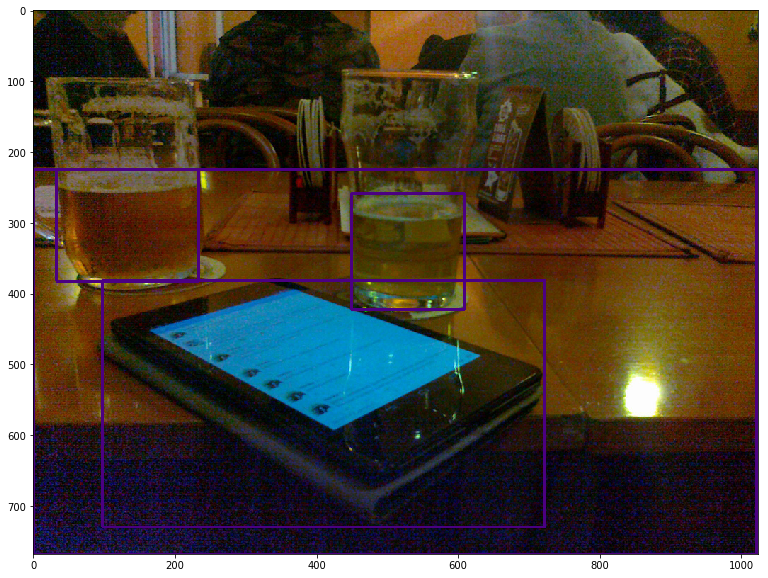

In [75]:
plt.figure(figsize=(15, 10))
plt.imshow(get_annotated_img(annos[3]))